<a href="https://colab.research.google.com/github/milenalebe/simulacion/blob/master/Random_Numbers_Generators_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

GENERADORES DE NUMEROS ALEATORIOS

In [ ]:

""" impementacion del medio del cuadrado recursiva"""

numbersMS = [] # lista de numeros aleatorios

def randNumbersMidSquare(seed, n, numbers = numbersMS):
    
    while (len(numbers)< n):
      x = seed**2
      ceros = "0" * (8 - len(str(x))) # obtiene la cantidad de ceros para que sea de 8 digitos
      x = ceros + str(x)
      numbers.append(int(x[2:6])) #toma los 4 nros del medio
      seed = numbers[-1]
    return numbers

randNumbersMidSquare(seed = 6923, n = (255*255))

print(numbersMS)



[9279, 998, 9960, 2016, 642, 4121, 9826, 5502, 2720, 3984, 8722, 732, 5358, 7081, 1405, 9740, 8676, 2729, 4474, 166, 275, 756, 5715, 6612, 7185, 6242, 9625, 6406, 368, 1354, 8333, 4388, 2545, 4770, 7529, 6858, 321, 1030, 609, 3708, 7492, 1300, 6900, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 

In [ ]:
randNumbersMidSquare(seed = 9731, n = 100)
print(numbers)

[7287, 1003, 60, 36, 12, 1, 0, 0, 0, 0, 6923, 9279, 998, 9960, 2016, 642, 4121, 9826, 5502, 2720, 3984, 8722, 732, 5358, 7081, 1405, 9740, 8676, 2729, 4474, 166, 275, 756, 5715, 6612, 7185, 6242, 9625, 6406, 368, 1354, 8333, 4388, 2545, 4770, 7529, 6858, 321, 1030, 609, 3708, 7492, 1300, 6900, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100]


In [ ]:
""" implementacion del medio del cuadrado con lambda"""

def randNumbersMidSquareLambda(seed, n):
    ret = [seed]
    pad = lambda x: "0"*(8-len(x))+x # define una funcion de una unica linea
    while len(ret)<n+1:
        ret.append(int(pad(str(ret[-1]**2))[2:6]))
    return ret[1:]


In [ ]:
"""generador lineal congruencial recursivo (limita a una cantidad máxima de n) """


numbersGLCRecursion = [] # lista de numeros aleatorios

m = 256
a = 3
c = 173
x0 = 78
n = 600


def randNumberGLCRecursion(seed = x0, n = n,m = m,a = a ,c = c, numbers = numbersGLCRecursion):
    
    if len(numbers) == n:
        return numbers
    b =(seed * a + c)
    x = b%m

    numbers.append(x) 
    return randNumberGLCRecursion(seed = int(numbers[-1]), n = n, numbers = numbers)

numbersGLCRecursion = randNumberGLCRecursion()

print(numbersGLCRecursion)

[151, 114, 3, 182, 207, 26, 251, 158, 135, 66, 115, 6, 191, 234, 107, 238, 119, 18, 227, 86, 175, 186, 219, 62, 103, 226, 83, 166, 159, 138, 75, 142, 87, 178, 195, 246, 143, 90, 187, 222, 71, 130, 51, 70, 127, 42, 43, 46, 55, 82, 163, 150, 111, 250, 155, 126, 39, 34, 19, 230, 95, 202, 11, 206, 23, 242, 131, 54, 79, 154, 123, 30, 7, 194, 243, 134, 63, 106, 235, 110, 247, 146, 99, 214, 47, 58, 91, 190, 231, 98, 211, 38, 31, 10, 203, 14, 215, 50, 67, 118, 15, 218, 59, 94, 199, 2, 179, 198, 255, 170, 171, 174, 183, 210, 35, 22, 239, 122, 27, 254, 167, 162, 147, 102, 223, 74, 139, 78, 151, 114, 3, 182, 207, 26, 251, 158, 135, 66, 115, 6, 191, 234, 107, 238, 119, 18, 227, 86, 175, 186, 219, 62, 103, 226, 83, 166, 159, 138, 75, 142, 87, 178, 195, 246, 143, 90, 187, 222, 71, 130, 51, 70, 127, 42, 43, 46, 55, 82, 163, 150, 111, 250, 155, 126, 39, 34, 19, 230, 95, 202, 11, 206, 23, 242, 131, 54, 79, 154, 123, 30, 7, 194, 243, 134, 63, 106, 235, 110, 247, 146, 99, 214, 47, 58, 91, 190, 231, 98, 2

In [ ]:
"GLC Rama"


numbersGLC = [] # lista de numeros aleatorios

m = 2**8
#m = 2**32
#a = 3
a = 3
c = 137
x0 = 97
n = 50

# m>0 / 0 < a < m 
# 0 <= c < m / 0 <= x0 < m

def randNumberGLC(seed = x0, n = n,m = m,a = a ,c = c):
    numbers = []
    while len(numbers) != n: 
      dividendo = (seed * a + c)%m
      numbers.append(dividendo) 
      seed = dividendo

    return numbers

numbersGLC = randNumberGLC()

print(numbersGLC)


[172, 141, 48, 25, 212, 5, 152, 81, 124, 253, 128, 9, 164, 117, 232, 65, 76, 109, 208, 249, 116, 229, 56, 49, 28, 221, 32, 233, 68, 85, 136, 33, 236, 77, 112, 217, 20, 197, 216, 17, 188, 189, 192, 201, 228, 53, 40, 1, 140, 45]


TESTEO NUMEROS GENERADOS

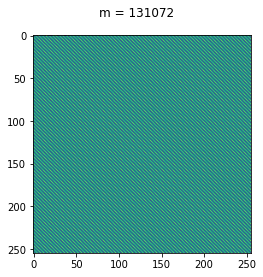

In [ ]:
"mapa de bits"

import numpy as np
import matplotlib.pyplot as plt

#s = int(np.sqrt(n))

#matrixGLC = np.array(numbersGLC).reshape((255,255))
matrixMS = np.array(numbersMS).reshape(255,255)

fig = plt.figure()
fig.suptitle('255 x 255 muestras del generador Medios Cuadrados')
plt.imshow(matrixMS)

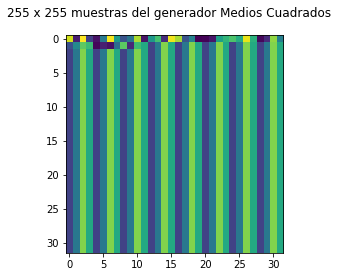

In [ ]:
matrixMS = np.array(numbersMS[:(32*32)]).reshape(32,32)

fig = plt.figure()
fig.suptitle('32 x 32 muestras del generador Medios Cuadrados')
plt.imshow(matrixMS)

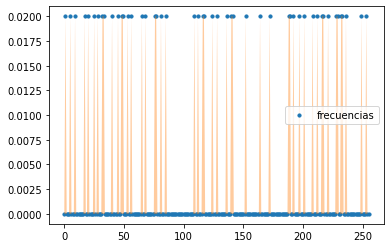

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# scatter frecuencia relativa de cada tirada

def frecuenciasAbsolutas(distribucion, maxN):
        frecuencias = []
        for n in range(maxN): 
            cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
            frecuencias.append(cantidad_n)
        return frecuencias
# 
def frecAbsDict(distribucion, maxN):
  frecDict = {}
  for n in range(maxN): 
    cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
    frecDict.update({n:cantidad_n})#agrego las frecuencias relativas con sus respectivos numeros 
  return frecDict

  

#print(frecAbsDict(numbersGLC, m))
#frecAbs = frecuenciasAbsolutas(numbersGLC, m)
frecAbs = frecuenciasAbsolutas(numbersGLC, m)
frec = np.array(frecAbs)/n
x = np.arange(len(frec))
fig, ax = plt.subplots()
ax.scatter(x, frec, label = 'frecuencias', s = 10)
ax.legend()
ax.fill_between(x, np.zeros(len(frec)), frec, alpha = 0.4)
plt.show()

In [ ]:
#prueba chi cuadrado GLC

import scipy.stats as stats

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 

print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)



206.00000000000014


Power_divergenceResult(statistic=206.0, pvalue=0.9891827412074204)

In [ ]:
# prueba chi cuadrado MS

import scipy.stats as stats

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)


50.48


Power_divergenceResult(statistic=50.48, pvalue=1.0049193415946907e-05)

In [ ]:
import scipy.stats as stats

numbersMS2 = numbersMS[:20]

frec_esperada = np.array([(len(numbersMS2)/max(numbersMS2)) for i in range (max(numbersMS2))])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)


27312.00000000599


Power_divergenceResult(statistic=27312.0, pvalue=0.0)

In [ ]:
import scipy.stats as stats

numbersMS2 = numbersMS[:3]

frec_esperada = np.array([(len(numbersMS2)/max(numbersMS2)) for i in range (max(numbersMS2))])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)

frec_esperada


182505.00000004316


array([0.0003012, 0.0003012, 0.0003012, ..., 0.0003012, 0.0003012,
       0.0003012])

In [ ]:
"Numeros aleatorios Python"
import numpy as np
import random


numerosPy = []
numerosPy = np.random.randint(0,50,50)
print(numerosPy)


[ 5 18 37  1 10  1 34 41  3  2 29 35 19 48 47 13 40 31 46 34 39 15  8 13
 43 25 18  8 11 14 32 34 14 18 41 11 29 48  0  9 23 11 15 17  5 10 13 16
 35  3]


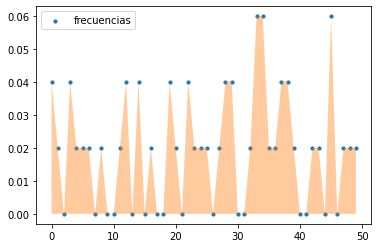

38.0


Power_divergenceResult(statistic=38.0, pvalue=0.8725439183746351)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# scatter frecuencia relativa de cada tirada
numerosPy = {}
numerosPy = np.random.randint(0,50,50)
numPy=numerosPy.tolist()

def frecuenciasAbsolutas(distribucion, maxN):
        frecuencias = []
        for n in range(maxN): 
            cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
            frecuencias.append(cantidad_n)
        return frecuencias
# 
def frecAbsDict(distribucion, maxN):
  frecDict = {}
  for n in range(maxN): 
    cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
    frecDict.update({n:cantidad_n})#agrego las frecuencias relativas con sus respectivos numeros 
  return frecDict

  

#print(frecAbsDict(numbersGLC, m))
#frecAbs = frecuenciasAbsolutas(numbersGLC, m)
m=50
n=50
frecAbs = frecuenciasAbsolutas(numPy, m)
frec = np.array(frecAbs)/n
x = np.arange(len(frec))
fig, ax = plt.subplots()
ax.scatter(x, frec, label = 'frecuencias', s = 10)
ax.legend()
ax.fill_between(x, np.zeros(len(frec)), frec, alpha = 0.4)
plt.show()

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 

print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)